# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [33]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [34]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [35]:
model = Sequential()
model.add(Dense(50, input_shape=(784,), activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

C:\Users\Anthony\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [36]:
from keras.src.optimizers import *

batch_size = 64
n_epoch = 90

model.compile(loss='categorical_crossentropy', optimizer=AdamW(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.3)

Epoch 1/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7159 - loss: 1.2345 - val_accuracy: 0.9037 - val_loss: 0.3792
Epoch 2/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9107 - loss: 0.3502 - val_accuracy: 0.9222 - val_loss: 0.2828
Epoch 3/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9285 - loss: 0.2655 - val_accuracy: 0.9324 - val_loss: 0.2434
Epoch 4/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9376 - loss: 0.2232 - val_accuracy: 0.9379 - val_loss: 0.2202
Epoch 5/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9455 - loss: 0.1941 - val_accuracy: 0.9433 - val_loss: 0.2013
Epoch 6/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9500 - loss: 0.1747 - val_accuracy: 0.9489 - val_loss: 0.1835
Epoch 7/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9570 - loss: 0.1568 - val_accuracy: 0.9532 - val_loss: 0.1707
Epoch 8/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9620 - loss: 0.1393 - val_accuracy: 0.

Show the performance of the model

Test score (loss): 0.15120166540145874
Test accuracy: 0.9696000218391418


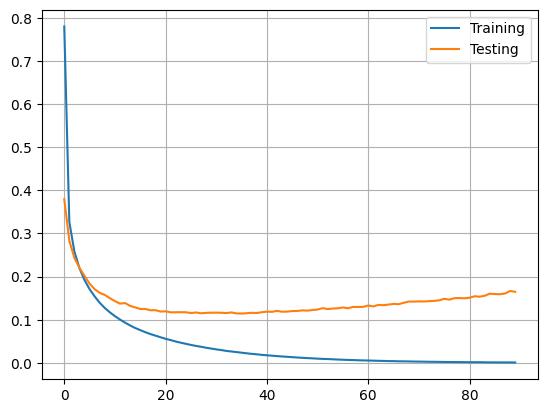

In [37]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score (loss):', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


array([[ 964,    0,    1,    1,    1,    4,    6,    1,    2,    0],
       [   0, 1121,    5,    1,    1,    1,    2,    1,    3,    0],
       [   4,    2, 1002,    7,    2,    1,    2,    6,    5,    1],
       [   2,    2,    3,  989,    1,    3,    0,    3,    6,    1],
       [   1,    1,    2,    1,  956,    0,    7,    1,    0,   13],
       [   4,    1,    0,   20,    4,  841,   12,    1,    5,    4],
       [   7,    3,    2,    1,    7,    6,  926,    0,    6,    0],
       [   0,    2,    9,    9,    2,    0,    0,  993,    2,   11],
       [   6,    1,    7,    8,    4,    5,    1,    5,  932,    5],
       [   3,    3,    0,    6,   10,    7,    1,    6,    1,  972]],
      dtype=int64)